In [3]:
# 
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# 
# !kaggle datasets download -d puneet6060/intel-image-classification
# 
# import zipfile
# zip_ref = zipfile.ZipFile('/content/intel-image-classification.zip', 'r')
# zip_ref.extractall('/content')
# zip_ref.close()

import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = 'seg_train/seg_train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = 'seg_test/seg_test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)


Found 14034 files belonging to 6 classes.
Found 3000 files belonging to 6 classes.


In [4]:
#Image Generator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Add data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,horizontal_flip=True,shear_range=0.2,  
    zoom_range=0.2, validation_split=0.1)

"""train_datagen = ImageDataGenerator(rescale = 1./255,
	    rotation_range=15,
      width_shift_range=0.1,
      height_shift_range=0.1,
      shear_range=0.01,
      zoom_range=[0.1, 1.5],
      horizontal_flip=True,
      fill_mode='nearest',
      zca_whitening=True,
      brightness_range=[0.1, 2]
)"""


train_generator=train_datagen.flow_from_directory(
      'seg_train/seg_train',
      target_size=(150,150),
      batch_size=64,
      class_mode='sparse',
      seed=2209,
      subset='training'
    
)

validation_generator=train_datagen.flow_from_directory(
      'seg_train/seg_train',
      target_size=(150,150),
      batch_size=64,
      class_mode='sparse',
      seed=2209,
      subset='validation'
    
)

test_datagen = ImageDataGenerator(rescale = 1./255.)
test_generator = test_datagen.flow_from_directory(
    'seg_test/seg_test', 
    target_size=(150,150),
    batch_size=32,
    class_mode='sparse',
    seed=2209
) 

test1_datagen = ImageDataGenerator(rescale = 1./255.)
test1_generator = test1_datagen.flow_from_directory(
    'seg_test/seg_test', 
    target_size=(150,150),
    batch_size=1,
    class_mode=None,
    shuffle=False,
    seed=2209
) 

Found 12632 images belonging to 6 classes.
Found 1402 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


# **Convolutional Neural Network**

<ipython-input-5-4082395b043a>:55: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history1=model1.fit_generator(


Epoch 1/10
197/197 [==============================] - 579s 3s/step - loss: 1.8070 - accuracy: 0.2957 - val_loss: 3.7809 - val_accuracy: 0.2068 - lr: 0.0010
Epoch 2/10
197/197 [==============================] - 400s 2s/step - loss: 1.2584 - accuracy: 0.4757 - val_loss: 2.4938 - val_accuracy: 0.3601 - lr: 0.0010
Epoch 3/10
197/197 [==============================] - 382s 2s/step - loss: 1.0742 - accuracy: 0.5754 - val_loss: 1.0929 - val_accuracy: 0.6057 - lr: 0.0010
Epoch 4/10
197/197 [==============================] - 333s 2s/step - loss: 0.9684 - accuracy: 0.6471 - val_loss: 0.9449 - val_accuracy: 0.6116 - lr: 0.0010
Epoch 5/10
197/197 [==============================] - 343s 2s/step - loss: 0.8848 - accuracy: 0.6983 - val_loss: 0.9081 - val_accuracy: 0.6696 - lr: 0.0010
Epoch 6/10
197/197 [==============================] - 360s 2s/step - loss: 0.7987 - accuracy: 0.7397 - val_loss: 1.2262 - val_accuracy: 0.6034 - lr: 0.0010
Epoch 7/10
197/197 [==============================] - 333s 2s/st

<ipython-input-5-4082395b043a>:64: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  accuracy=model1.evaluate_generator(test_generator, steps=len(test_generator)//32, callbacks=[reduce],verbose=2)


2/2 - 1s - loss: 0.6754 - accuracy: 0.7656 - 687ms/epoch - 343ms/step
Accuracy of the model on the test set:  0.765625


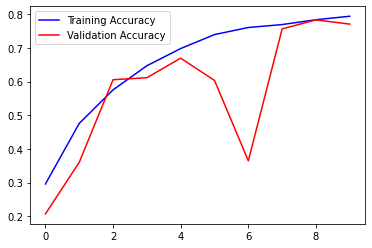

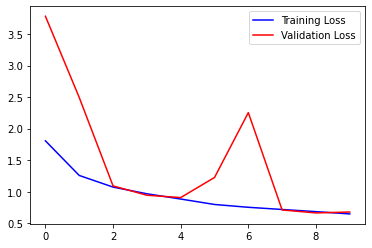

In [5]:
import tensorflow as tf
from keras import regularizers

model1=tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(150,150,3)),
    tf.keras.layers.Conv2D(16,(3,3),activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(3,3),
    
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
   
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.Conv2D(256,(3,3),activation='relu',padding='same'),
    tf.keras.layers.Conv2D(256,(3,3),activation='relu',padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),
    
  
    tf.keras.layers.Flatten(),
       
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.4),
    
    tf.keras.layers.Dense(6,activation='softmax')
])
reduce =tf. keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, mode='auto')
#early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-4, patience=10, mode='auto')
model1.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history1=model1.fit_generator(
  train_generator,
  steps_per_epoch=int(12632/64),
  epochs=10,
  validation_data=validation_generator,
  validation_steps=int(1402/64),
  callbacks=[reduce],
  verbose=1
)
accuracy=model1.evaluate_generator(test_generator, steps=len(test_generator)//32, callbacks=[reduce],verbose=2)
print('Accuracy of the model on the test set: ',accuracy[1])
#Evaluating Accuracy and Loss of the model
%matplotlib inline
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']

loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs = range(len(acc)) #No. of epochs

#Plot training and validation accuracy per epoch
import matplotlib.pyplot as plt
plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.legend()
plt.show()

#Plot training and validation loss per epoch
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.legend()
plt.show()